In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from goes16ci.data import load_data_serial

1. Brier Skill Score by epoch. Brier score is the mean squared error for probability forecasts, or np.mean((predictions - true_labels) ** 2)). Brier skill score is 1 - brier_score / brier_score_climatology.
brier_score_climatology = np.mean((predictions.mean() - true_labels) ** 2)

2. Find the validation example that maximizes the probability of lightning. Plot each of the channels of the patch as separate subplots using matplotlib pcolormesh. Use the Greys colormap. I would recommend using the min-max normalized version of the data and set vmin=0 and vmax=1.

In [2]:
val_his = pd.read_csv("AUC_history.csv")
val_his.head()

,loss,[0.2287439657077053,0.16073365356401312,0.14878632390678714,0.13955095187531127,0.13342304872927693,0.12846669494768995,0.1217046270324461,0.1164241275533669,0.11321644687888313,...,0.10478149682227277,0.10396075069679828,0.09915352153295402,0.10379485468630961,0.09551849457391462,0.0899673647131848,0.0888117604723758,0.0842381138378393,0.08112328088103939,0.07985504032359958]
0,mean_squared_error,[0.06803493,0.047910,0.044488,0.041813,0.039684,0.038308,0.036185,0.034529,0.033679,...,0.030902,0.030646,0.029328,0.030886,0.027897,0.026262,0.025843,0.024602,0.023408,0.023128202]
1,AUC,[0.95101774,0.976566,0.979658,0.982040,0.983449,0.984640,0.986084,0.987378,0.988053,...,0.989633,0.989927,0.990778,0.989749,0.991348,0.992398,0.992433,0.993327,0.993701,0.99383813]
2,val_loss,[0.4271122461443494,0.364584,0.498648,0.735612,0.943723,1.091638,1.107897,1.024137,0.751683,...,0.343931,0.170183,0.217512,0.231666,0.125443,0.104560,0.110603,0.108602,0.141705,0.12756620107633862]
3,val_mean_squared_error,[0.12614524,0.111356,0.129116,0.135649,0.136691,0.136888,0.136860,0.134419,0.131770,...,0.081578,0.046673,0.060145,0.071530,0.038128,0.029444,0.032002,0.030673,0.037241,0.037720058]
4,val_AUC,[0.9005979,0.905257,0.881517,0.565848,0.500446,0.500058,0.498214,0.570097,0.689165,...,0.915556,0.967810,0.965209,0.958695,0.978984,0.983475,0.982165,0.981273,0.974041,0.9800033]


In [3]:
AUC = val_his.iloc[1]
y_AUC = []
x_AUC = []
for i in AUC:
    y_AUC.append(i)
y_AUC = y_AUC[1:]
#print(y_val_AUC[0])
y_AUC[0] = float(y_AUC[0][1:])
#print(y_val_AUC[0])
#print(y_val_AUC[19])
y_AUC[19] = str(y_AUC[19])
y_AUC[19] = float(y_AUC[19][:-1])
print(y_AUC[19])
for ii in range(21):
    x_AUC.append(ii)
x_AUC = x_AUC[1:]
print(y_AUC)
print(x_AUC)

0.99383813
[0.95101774, 0.97656626, 0.9796575000000001, 0.9820404, 0.98344946, 0.98463976, 0.98608375, 0.98737836, 0.9880532, 0.98935133, 0.98963255, 0.9899271000000001, 0.99077755, 0.9897485999999999, 0.99134815, 0.9923978999999999, 0.9924334, 0.99332666, 0.99370074, 0.99383813]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Text(0, 0.5, 'Training AUC')

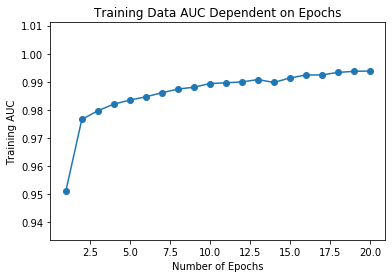

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_AUC,y_AUC)
ax.plot(x_AUC,y_AUC)
plt.title('Training Data AUC Dependent on Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Training AUC')

0.9800033
[0.9005979, 0.905257, 0.88151723, 0.5658484, 0.50044644, 0.5000581000000001, 0.4982137, 0.57009715, 0.68916494, 0.863626, 0.9155559999999999, 0.9678103000000001, 0.9652088, 0.9586952, 0.97898364, 0.98347485, 0.9821652, 0.98127276, 0.9740408000000002, 0.9800033]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Text(0, 0.5, 'Validation AUC')

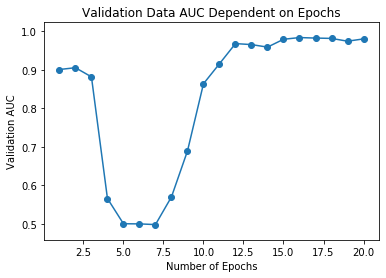

In [8]:
AUC = val_his.iloc[4]
y_val_AUC = []
x_val_AUC = []
for i in AUC:
    y_val_AUC.append(i)
y_val_AUC = y_val_AUC[1:]
#print(y_val_AUC[0])
y_val_AUC[0] = float(y_val_AUC[0][1:])
#print(y_val_AUC[0])
#print(y_val_AUC[19])
y_val_AUC[19] = str(y_val_AUC[19])
y_val_AUC[19] = float(y_val_AUC[19][:-1])
print(y_val_AUC[19])
for ii in range(21):
    x_val_AUC.append(ii)
x_val_AUC = x_val_AUC[1:]
print(y_val_AUC)
print(x_val_AUC)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_val_AUC,y_val_AUC)
ax.plot(x_val_AUC,y_val_AUC)
plt.title('Validation Data AUC Dependent on Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation AUC')

plot a few of the examples that the neural network predicts a high probability of lightning and actual produce lightning, once you get a network trained.

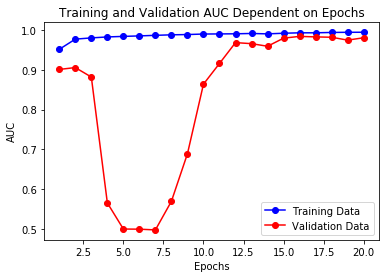

In [17]:
plt.plot(x_AUC, y_AUC, 'bo-', label = 'Training Data')
plt.plot(x_val_AUC,y_val_AUC, color='r',marker='o', label = 'Validation Data')
plt.legend()
plt.title('Training and Validation AUC Dependent on Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.savefig('Validation_and_Training_AUC.png',dpi=300, bbox_inches="tight")

To make the other plot I am asking for, you need to complete the following steps in the jupyter notebook:
1. Load in the data. You can use the data loading function from the benchmark script, and you may need to copy over the normalization and splitting code too.

2. Load your trained neural network with keras load_model.

3. Send the validation data through the neural network and generate a prediction for each validation example. Use the predict method of the model.

4. Find the examples that have both predicted probabilities near 1 and where val_counts > 0. Ideally, find the examples with both high predicted probability and high val_counts values.

5. Plot the examples with both the highest probabilities and the highest val_counts. After you filter for probabilities over a certain threshold rank by val_counts from highest to lowest. You will want to use plt.pcolormesh to do the plotting. I would recommend plotting only 1 satellite band since they will all look somewhat similar.

In [4]:
from goes16ci.data import load_data_serial
from datetime import datetime
import tensorflow as tf

In [9]:
print(datetime.now())
type(datetime.now())
date_time = str(datetime.now())
print(type(date_time))

2020-05-05 18:23:13.475530
<class 'str'>


In [ ]:
#Load in the data( validation data? )
all_data, all_count, all_time = load_data_serial(
    "/glade/scratch/gwallach/goes16_nc/ABI_patches_20190315_32/", start_date='2019-03-01')

#load in trained nueral network
#filepath = have to find the saved model
goes_model = tf.keras.models.load_model(
    'goes16ci_model.h5', custom_objects=None, compile=True
)

#Send validation data through nueral network and generate prediction

#Find examples with predicted probabilties near 1
#Where val_counts > 0; find high probability and high val_count

#rank val count from highest to lowest; plot with plt.pcolormesh
